### 회귀분석 연습하기

In [1]:
import pandas as pd

In [2]:
height = [170, 168, 177, 181, 172, 171, 169, 175, 174, 178, 170, 167, 177, 182, 173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

* 교재와 다른방식으로 DataFrame 만듦

In [3]:
body = pd.DataFrame([height, weight], index=['height', ' weight']).T

In [4]:
body.tail()

,height,weight
19,177,81
20,186,84
21,166,73
22,183,78
23,168,69


In [5]:
import statsmodels.api as sm

In [6]:
reg = sm.OLS.from_formula('weight ~ height', body).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     31.57
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           1.20e-05
Time:                        12:38:15   Log-Likelihood:                -60.095
No. Observations:                  24   AIC:                             124.2
Df Residuals:                      22   BIC:                             126.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.8238     20.520     -1.989      0.059     -83.381       1.733
height         0.6618      0.118      5.619      0.000       0.418       0.906
==============================================================================
Omnibus:                        4.339   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                1.533
Skew:                          -0.036   Prob(JB):                        0.465
Kurtosis:                       1.764   Cond. No.                     5.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 실습1 1만명의 키와 몸무게 정보
>키가 몸무게에 영향을 주지 몸무게가 키에 영향을 주지 않으므로
>
>몸무게를 종속변수, 키를 독립변수로 두고 회귀분석 실행

In [7]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [8]:
data = pd.read_excel('211206 회귀분석 예제 실습/data/weight-height.xlsx')
model = smf.ols(formula='Weight1~Height1', data=data).fit()   # formula=, data= 안스려면 같이 안써줘야함.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Weight1   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 5.846e+04
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:38:17   Log-Likelihood:                -31361.
No. Observations:               10000   AIC:                         6.273e+04
Df Residuals:                    9998   BIC:                         6.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -158.8027      0.959   -165.558      0.000    -160.683    -156.922
Height1        1.3776      0.006    241.793      0.000       1.366       1.389
==============================================================================
Omnibus:                        1.492   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.495
Skew:                           0.030   Prob(JB):                        0.473
Kurtosis:                       2.996   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 회귀분석 결과 산점도 그리기

In [9]:
# height = data['Height1'].to_list()   # 교재내용은 이런식으로 열을 리스트로 만들어서
# weight = data['Weight1'].to_list()   # 다시 DataFram을 만듦
body = data[['Height1','Weight1']]     # 교재와 다르게 컬럼만 빼옴
body.columns = ['키','몸무게']         # 이것도 의미 읎는 짓인게 아래처럼 data에서 컬럼만 빼와도 됨.

In [10]:
body.head()

,키,몸무게
0,187,109
1,174,73
2,188,96
3,182,99
4,177,93


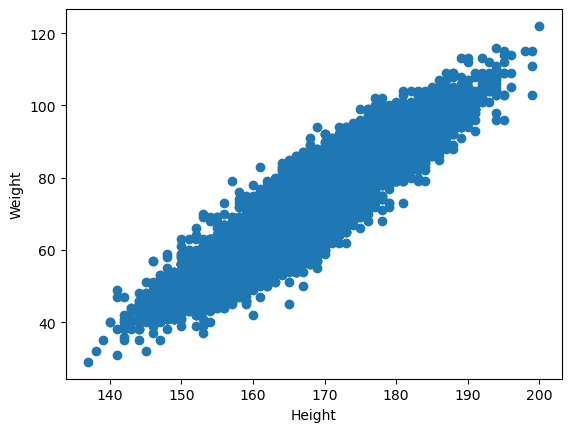

In [11]:
plt.scatter(data['Height1'], data['Weight1'])
# plt.scatter(body['키'], body['몸무게'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### 실습2 Toluca Company dataset 로 실습

In [12]:
import matplotlib
from statsmodels.formula.api import ols

In [13]:
df = pd.read_csv('211206 회귀분석 예제 실습/data/toluca_company_dataset.csv')
df.head()

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


* 산점도로 시각화하여 데이터 분포 확인

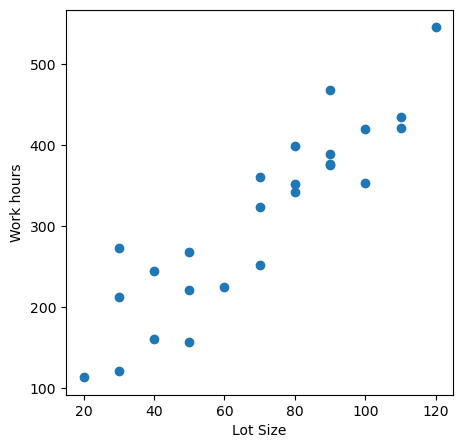

In [14]:
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')

font_size = 10
plt.scatter(df['Lot_size'], df['Work_hours'])
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work hours', fontsize=font_size)
plt.show()

* 회귀분석모델 적합 결과 확인

> statsmodels 라이브러리의 summary 함수로 회귀분석모델 적합 결과 요약 확인

In [15]:
fit = ols('Work_hours~Lot_size', df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           4.45e-10
Time:                        12:38:18   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(fit.params.Intercept)   # 절편
print(fit.params.Lot_size)    # 기울기

62.36585858585873
3.5702020202020197


* 작업시간 추정치 구하기

In [17]:
fit.fittedvalues

0     347.982020
1     169.471919
2     240.875960
3     383.684040
4     312.280000
5     276.577980
6     490.790101
7     347.982020
8     419.386061
9     240.875960
10    205.173939
11    312.280000
12    383.684040
13    133.769899
14    455.088081
15    419.386061
16    169.471919
17    240.875960
18    383.684040
19    455.088081
20    169.471919
21    383.684040
22    205.173939
23    347.982020
24    312.280000
dtype: float64

* 잔차 구하기

>모델 검증에 필요한 잔차를 resid 필드를 이용하여 구함

In [18]:
fit.resid

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
dtype: float64

* 새로운 제품 크기에 대한 작업시간의 예측값 구하기

In [19]:
fit.predict(exog=dict(Lot_size=[80]))

0    347.98202
dtype: float64

* 회귀직선 시각화

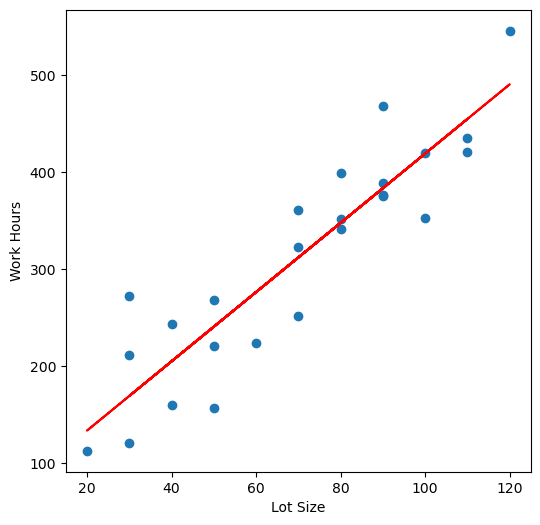

In [20]:
fig = plt.figure(figsize=(6,6))
fig.set_facecolor('white')

font_size = 10
plt.scatter(df['Lot_size'], df['Work_hours'])
plt.plot(df['Lot_size'], fit.fittedvalues, color='red')

plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours', fontsize=font_size)
plt.show()

* 회귀분석 모델의 적합성을 확인하기 위해 잔차도 시각화
* 잔차도 <u>Residual Plot</u>

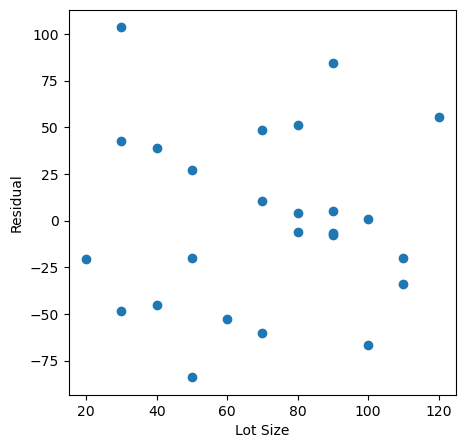

In [21]:
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
font_size = 10

plt.scatter(df['Lot_size'], fit.resid)

plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Residual')
plt.show()

* 잔차도에서 특별한 패턴이 보이지는 않는다.

### scikit-learn 을 이용한 회귀분석

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x = df['Lot_size'].values.reshape(-1,1)  # 차원증가
y = df['Work_hours']

fit = LinearRegression().fit(x,y)        # 단순선형회귀모형 적합

In [24]:
print(fit.intercept_)  # 절편
print(fit.coef_)       # 기울기

62.365858585858575
[3.57020202]


* 작업시간과 추정값 출력

> statsmodels 에서는 fittedvalues 로 학습 데이터의 설명 변수에 대응하는 작업시간의 추정값을 구할수있으나,
>
> sklearn에서는 predict 함수를 사용해야한다.

In [30]:
fit.predict(x)

array([347.9820202 , 169.47191919, 240.8759596 , 383.6840404 ,
       312.28      , 276.5779798 , 490.79010101, 347.9820202 ,
       419.38606061, 240.8759596 , 205.17393939, 312.28      ,
       383.6840404 , 133.76989899, 455.08808081, 419.38606061,
       169.47191919, 240.8759596 , 383.6840404 , 455.08808081,
       169.47191919, 383.6840404 , 205.17393939, 347.9820202 ,
       312.28      ])

* 잔차

In [32]:
residual = y - fit.predict(x)
residual

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
Name: Work_hours, dtype: float64

* 예측값 개산을 위해 predict함수에 이중 [[ ]] 로 값을 넘겨준다.

In [ ]:
fit.predict([[80]])